### At first, we will import a few of the library that going to be used later more data cleansing

In [1]:
# Some imports - for style reasons, try and put in alphabetical order, unless there are subgroupings of imports
# that you want.
import matplotlib # we'll only use this to determine the matplotlib version number
import matplotlib.pyplot as plt  # the graphing library
import numpy as np # scientific computing library
import pandas as pd # the data structure and analysis library
from pandas import DataFrame, read_csv, Series # specific functions from pandas
import seaborn as sns # Makes graphs look pretty
import sys # we'll only use this to determine the python version number
from sklearn.model_selection import train_test_split # Split the dataset to training dataset and testing dataset
from sklearn import metrics # use for calculate the MAE, MSE, and RMSE
import seaborn as seabornInstance # the graphing library
from sklearn.svm import SVR

# Enable inline plotting.  The % is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline

### Importing community mobility dataset

In [2]:
# Importing community mobility dataset
globalMobility = pd.read_csv("Dataset\CommunityMobility\Global_Mobility_Report.csv", dtype = {"sub_region_2" : "str"})
globalMobility.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [3]:
#populating all columns
globalMobility.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'date', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

As per initial observation, 'country_region_code', 'country_region', 'sub_region_1', and 'sub_region_2' will be used as specific location reference where 'date' will be our index when we are selecting specific country analysis. Columns endwith 'percent_change_from_baseline' are basically showing the comparison of percentage dropping or increasing from baseline.

In [4]:
print(globalMobility.country_region_code.unique())
print('Is there any NULL value? ' + str(len(globalMobility.country_region_code.isnull())))

['AE' 'AF' 'AG' 'AO' 'AR' 'AT' 'AU' 'AW' 'BA' 'BB' 'BD' 'BE' 'BF' 'BG'
 'BH' 'BJ' 'BO' 'BR' 'BS' 'BW' 'BY' 'BZ' 'CA' 'CH' 'CI' 'CL' 'CM' 'CO'
 'CR' 'CV' 'CZ' 'DE' 'DK' 'DO' 'EC' 'EE' 'EG' 'ES' 'FI' 'FJ' 'FR' 'GA'
 'GB' 'GE' 'GH' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HT' 'HU' 'ID' 'IE' 'IL'
 'IN' 'IQ' 'IT' 'JM' 'JO' 'JP' 'KE' 'KG' 'KH' 'KR' 'KW' 'KZ' 'LA' 'LB'
 'LI' 'LK' 'LT' 'LU' 'LV' 'LY' 'MD' 'MK' 'ML' 'MM' 'MN' 'MT' 'MU' 'MX'
 'MY' 'MZ' nan 'NE' 'NG' 'NI' 'NL' 'NO' 'NP' 'NZ' 'OM' 'PA' 'PE' 'PG' 'PH'
 'PK' 'PL' 'PR' 'PT' 'PY' 'QA' 'RE' 'RO' 'RS' 'RW' 'SA' 'SE' 'SG' 'SI'
 'SK' 'SN' 'SV' 'TG' 'TH' 'TJ' 'TR' 'TT' 'TW' 'TZ' 'UG' 'US' 'UY' 'VE'
 'VN' 'YE' 'ZA' 'ZM' 'ZW']
Is there any NULL value? 477322


In [5]:
globalMobility[globalMobility.loc[:,'country_region_code'].isnull()]

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
121669,NaN,Namibia,NaN,NaN,2020-02-15,-5.0,-8.0,2.0,-8.0,2.0,3.0
121670,NaN,Namibia,NaN,NaN,2020-02-16,-12.0,-10.0,4.0,-9.0,-1.0,2.0
121671,NaN,Namibia,NaN,NaN,2020-02-17,-13.0,-14.0,-3.0,-17.0,6.0,1.0
121672,NaN,Namibia,NaN,NaN,2020-02-18,-15.0,-14.0,-6.0,-11.0,6.0,2.0
121673,NaN,Namibia,NaN,NaN,2020-02-19,-13.0,-14.0,-5.0,-15.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
122488,NaN,Namibia,Otjozondjupa Region,NaN,2020-05-26,NaN,NaN,NaN,NaN,-12.0,NaN
122489,NaN,Namibia,Otjozondjupa Region,NaN,2020-05-27,NaN,NaN,NaN,NaN,-10.0,NaN
122490,NaN,Namibia,Otjozondjupa Region,NaN,2020-05-28,NaN,NaN,NaN,NaN,-8.0,NaN
122491,NaN,Namibia,Otjozondjupa Region,NaN,2020-05-29,NaN,NaN,NaN,NaN,-5.0,NaN


In [6]:
globalMobility[globalMobility.loc[:,'country_region_code'].isnull()].country_region.unique()

array(['Namibia'], dtype=object)

As we can see, head() and tail() values are value:NaN for column:'country_region_code' and we can see that its for value:'Namibia' for column:'country_region'. Based on the ISO 2 code character, its 'NA' in string value for representing Namibia. Thus, we will be replace value:NaN to value:'NA' for column:'country_region_code'.

In [7]:
globalMobility['country_region_code'] = globalMobility['country_region_code'].fillna("NA")

We are replacing value:NaN for column:'sub_region_1' and column:'sub_region_2' with empty string in order to make slicing easier later.

In [8]:
globalMobility['sub_region_1'] = globalMobility['sub_region_1'].fillna("")
globalMobility['sub_region_2'] = globalMobility['sub_region_2'].fillna("")

We will convert our column:'date' to datetime format for indexing purpose during plotting

In [9]:
globalMobility['date'] = pd.to_datetime(globalMobility['date'])

We will first stripping our the while space from all object columns and then convert all to uppercase. This will be standardizing the format of column while using it for data join.

In [10]:
globalMobility_obj = globalMobility.select_dtypes(['object'])
globalMobility[globalMobility_obj.columns] = globalMobility_obj.apply(lambda x: x.str.upper())

In [11]:
globalMobility_obj = globalMobility.select_dtypes(['object'])
globalMobility[globalMobility_obj.columns] = globalMobility_obj.apply(lambda x: x.str.strip())

In [12]:
globalMobility.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,UNITED ARAB EMIRATES,,,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,UNITED ARAB EMIRATES,,,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,UNITED ARAB EMIRATES,,,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,UNITED ARAB EMIRATES,,,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,UNITED ARAB EMIRATES,,,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [13]:
print("Is there any NULL for column:'country_region_code'? "+
      str(len(globalMobility[globalMobility.loc[:,'country_region_code'].isnull()])))
print("Is there any NULL for column:'country_region'? "+
      str(len(globalMobility[globalMobility.loc[:,'country_region'].isnull()])))
print("Is there any NULL for column:'sub_region_1'? "+
      str(len(globalMobility[globalMobility.loc[:,'sub_region_1'].isnull()])))
print("Is there any record that only specifying country without sub_region_1? "+
      str(len(globalMobility[(globalMobility['country_region_code'] != '') & (globalMobility['sub_region_1'] == '')])))

Is there any NULL for column:'country_region_code'? 0
Is there any NULL for column:'country_region'? 0
Is there any NULL for column:'sub_region_1'? 0
Is there any record that only specifying country without sub_region_1? 13860


In [14]:
globalMobility[(globalMobility['country_region_code'] != '') & (globalMobility['sub_region_1'] == '')]

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,UNITED ARAB EMIRATES,,,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,UNITED ARAB EMIRATES,,,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,UNITED ARAB EMIRATES,,,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,UNITED ARAB EMIRATES,,,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,UNITED ARAB EMIRATES,,,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
476400,ZW,ZIMBABWE,,,2020-05-25,-46.0,-32.0,-32.0,-62.0,-69.0,36.0
476401,ZW,ZIMBABWE,,,2020-05-26,-24.0,-15.0,-17.0,-44.0,-18.0,22.0
476402,ZW,ZIMBABWE,,,2020-05-27,-21.0,-11.0,-15.0,-41.0,-20.0,24.0
476403,ZW,ZIMBABWE,,,2020-05-28,-20.0,-10.0,-18.0,-42.0,-19.0,24.0


Above result is telling us that these records are for country specific.

### Data Visualisation for community mobility dataset

In [15]:
def plot_all_out(oriData,countryRegionCode,subRegion=''):
    
    if(len(countryRegionCode.strip()) == 0):
        return('Country Region Code cannot be empty')
    if(len(oriData[(oriData['country_region_code'] == countryRegionCode) & (oriData['sub_region_1'] == subRegion)]) == 0):
        return("Country Region Code:"+countryRegionCode+",Sub Region:"+subRegion+" is not available")        
              
    data = oriData[(oriData['country_region_code'] == countryRegionCode) & (oriData['sub_region_1'] == subRegion)]
    
    # Create figure and plot space
    fig, ax = plt.subplots(3, 2,figsize=(15, 12))
    
    country = data['country_region'].iloc[0]
    country = country.strip()
    subregion = data['sub_region_1'].iloc[0]
    subregion = subregion.strip()
    location = ''

    if(len(subregion) > 0):
        location = location + subregion

    if(len(country) > 0):
        if(len(location) > 0):
            location = location + ','
        location = location + country
        
    fig.suptitle(location,fontsize=28)
    
    operandFormatter= lambda i: ("+" if i > 0 else "") + str(i)
    
    # Add x-axis and y-axis
    retail_and_recreation_mean = operandFormatter(round(data['retail_and_recreation_percent_change_from_baseline'].mean(),0))+"% compared to baseline"
    text_x_position = data.iloc[len(data['date'])//2]['date']
    text_y_position = data['retail_and_recreation_percent_change_from_baseline'].median()
    ax[0,0].plot(data['date'],data['retail_and_recreation_percent_change_from_baseline'])
    ax[0,0].fill_between(data['date'], data['retail_and_recreation_percent_change_from_baseline'], color="skyblue", alpha=0.2)
    ax[0,0].set(xlabel='Date',ylabel='% change from baseline',title='Retail & Recreation')
    ax[0,0].text(text_x_position,text_y_position,retail_and_recreation_mean,size=20,ha='center')
    
    grocery_and_pharmacy_mean = operandFormatter(round(data['grocery_and_pharmacy_percent_change_from_baseline'].mean(),0))+"% compared to baseline"
    text_x_position = data.iloc[len(data['date'])//2]['date']
    text_y_position = data['grocery_and_pharmacy_percent_change_from_baseline'].median()
    ax[0,1].plot(data['date'],data['grocery_and_pharmacy_percent_change_from_baseline'])
    ax[0,1].fill_between(data['date'], data['grocery_and_pharmacy_percent_change_from_baseline'], color="skyblue", alpha=0.2)
    ax[0,1].set(xlabel='Date',ylabel='% change from baseline',title='Grocery & Pharmacy')
    ax[0,1].text(text_x_position,text_y_position,grocery_and_pharmacy_mean,size=20,ha='center')
    
    parks_mean = operandFormatter(round(data['parks_percent_change_from_baseline'].mean(),0))+"% compared to baseline"
    text_x_position = data.iloc[len(data['date'])//2]['date']
    text_y_position = data['parks_percent_change_from_baseline'].median()
    ax[1,0].plot(data['date'],data['parks_percent_change_from_baseline'])
    ax[1,0].fill_between(data['date'], data['parks_percent_change_from_baseline'], color="skyblue", alpha=0.2)
    ax[1,0].set(xlabel='Date',ylabel='% change from baseline',title='Parks')
    ax[1,0].text(text_x_position,text_y_position,parks_mean,size=20,ha='center')
    
    transit_stations_mean = operandFormatter(round(data['transit_stations_percent_change_from_baseline'].mean(),0))+"% compared to baseline"
    text_x_position = data.iloc[len(data['date'])//2]['date']
    text_y_position = data['transit_stations_percent_change_from_baseline'].median()
    ax[1,1].plot(data['date'],data['transit_stations_percent_change_from_baseline'])
    ax[1,1].fill_between(data['date'], data['transit_stations_percent_change_from_baseline'], color="skyblue", alpha=0.2)
    ax[1,1].set(xlabel='Date',ylabel='% change from baseline',title='Transit Stations')
    ax[1,1].text(text_x_position,text_y_position,transit_stations_mean,size=20,ha='center')
    
    workplaces_mean = operandFormatter(round(data['workplaces_percent_change_from_baseline'].mean(),0))+"% compared to baseline"
    text_x_position = data.iloc[len(data['date'])//2]['date']
    text_y_position = data['workplaces_percent_change_from_baseline'].median()
    ax[2,0].plot(data['date'],data['workplaces_percent_change_from_baseline'])
    ax[2,0].fill_between(data['date'], data['workplaces_percent_change_from_baseline'], color="skyblue", alpha=0.2)
    ax[2,0].set(xlabel='Date',ylabel='% change from baseline',title='Workplaces')
    ax[2,0].text(text_x_position,text_y_position,retail_and_recreation_mean,size=20,ha='center')
    
    residential_mean = operandFormatter(round(data['residential_percent_change_from_baseline'].mean(),0))+"% compared to baseline"
    text_x_position = data.iloc[len(data['date'])//2]['date']
    text_y_position = data['residential_percent_change_from_baseline'].median()
    ax[2,1].plot(data['date'],data['residential_percent_change_from_baseline'])
    ax[2,1].fill_between(data['date'], data['residential_percent_change_from_baseline'], color="skyblue", alpha=0.2)
    ax[2,1].set(xlabel='Date',ylabel='% change from baseline',title='Residential')
    ax[2,1].text(text_x_position,text_y_position,residential_mean,size=20,ha='center')
    
    # Set title and labels for axes
    #ax.set(xlabel=xaxisLabel,
    #   ylabel=yaxisLabel,
    #   title=plotTitle)

    fig.autofmt_xdate()
    plt.show()

In [16]:
print("Country Region Code list:")
print(globalMobility['country_region_code'].unique())

selected_country_region_code = 'GB'
print("\nSelected Sub Region list: " + selected_country_region_code)
print(globalMobility[globalMobility['country_region_code'] == selected_country_region_code]['sub_region_1'].unique())

Country Region Code list:
['AE' 'AF' 'AG' 'AO' 'AR' 'AT' 'AU' 'AW' 'BA' 'BB' 'BD' 'BE' 'BF' 'BG'
 'BH' 'BJ' 'BO' 'BR' 'BS' 'BW' 'BY' 'BZ' 'CA' 'CH' 'CI' 'CL' 'CM' 'CO'
 'CR' 'CV' 'CZ' 'DE' 'DK' 'DO' 'EC' 'EE' 'EG' 'ES' 'FI' 'FJ' 'FR' 'GA'
 'GB' 'GE' 'GH' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HT' 'HU' 'ID' 'IE' 'IL'
 'IN' 'IQ' 'IT' 'JM' 'JO' 'JP' 'KE' 'KG' 'KH' 'KR' 'KW' 'KZ' 'LA' 'LB'
 'LI' 'LK' 'LT' 'LU' 'LV' 'LY' 'MD' 'MK' 'ML' 'MM' 'MN' 'MT' 'MU' 'MX'
 'MY' 'MZ' 'NA' 'NE' 'NG' 'NI' 'NL' 'NO' 'NP' 'NZ' 'OM' 'PA' 'PE' 'PG'
 'PH' 'PK' 'PL' 'PR' 'PT' 'PY' 'QA' 'RE' 'RO' 'RS' 'RW' 'SA' 'SE' 'SG'
 'SI' 'SK' 'SN' 'SV' 'TG' 'TH' 'TJ' 'TR' 'TT' 'TW' 'TZ' 'UG' 'US' 'UY'
 'VE' 'VN' 'YE' 'ZA' 'ZM' 'ZW']

Selected Sub Region list: GB
['' 'ABERDEEN CITY' 'ABERDEENSHIRE' 'ANGUS COUNCIL'
 'ANTRIM AND NEWTOWNABBEY' 'ARDS AND NORTH DOWN' 'ARGYLL AND BUTE COUNCIL'
 'ARMAGH CITY, BANBRIDGE AND CRAIGAVON' 'BATH AND NORTH EAST SOMERSET'
 'BEDFORD' 'BELFAST' 'BLACKBURN WITH DARWEN' 'BLACKPOOL' 'BLAENAU GWENT'
 '

We can pick any available country from the dataset in order to view its community mobility. Should you want to specify the sub region too, please use above code to search for any available sub region.

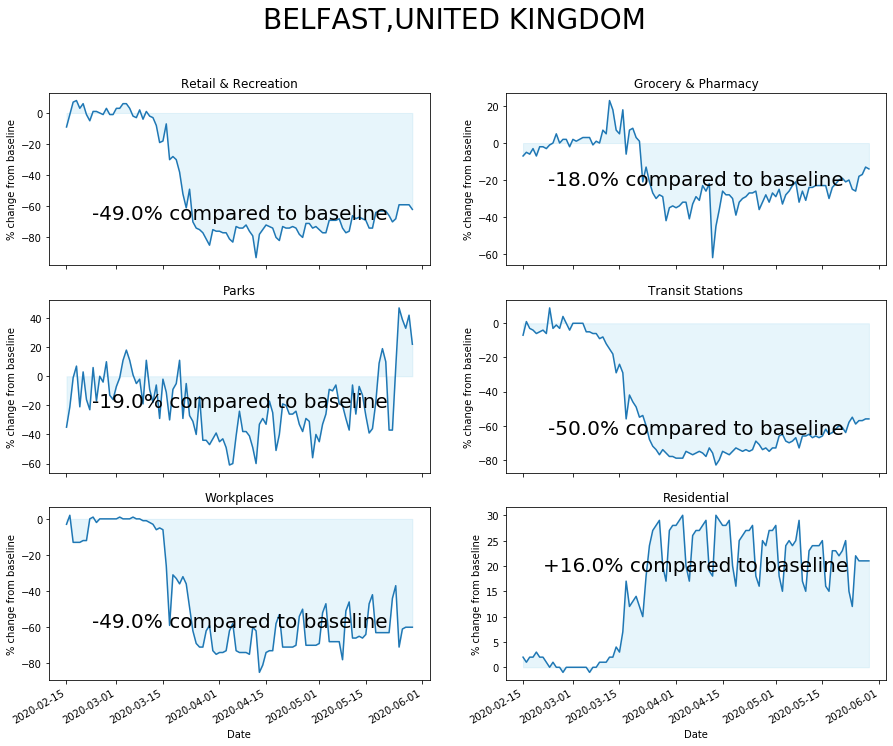

In [17]:
plot_all_out(oriData=globalMobility,countryRegionCode='GB',subRegion='BELFAST')

### Importing air quality dataset

At first, we will import air quality dataset for 2019 Q4 because we might interest how will be the air quality before covid-19 started.

In [18]:
airQuality_2019Q4 = pd.read_csv("Dataset\AirQuality\waqi-covid19-airqualitydata-2019Q4.csv",comment='#')
airQuality_2019Q4.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2019-11-02,HU,Debrecen,o3,72,1.9,12.2,7.0,59.60
1,2019-11-11,HU,Debrecen,o3,66,0.6,15.2,7.1,151.12
2,2019-11-12,HU,Debrecen,o3,65,2.3,18.9,12.0,193.29
3,2019-12-22,HU,Debrecen,o3,45,11.3,24.1,18.6,110.54
4,2020-01-05,HU,Debrecen,o3,34,1.6,26.4,16.7,586.81


Then we will import whole air quality dataset for 2020 up until recent.

In [19]:
airQuality_2020 = pd.read_csv("Dataset\AirQuality\waqi-covid19-airqualitydata-2020.csv",comment='#')
airQuality_2020.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2020-01-17,ZA,Middelburg,wd,48,2.0,347.0,220.0,102082.00
1,2020-03-08,ZA,Middelburg,wd,40,22.0,304.0,147.0,31597.10
2,2020-04-13,ZA,Middelburg,wd,48,11.0,314.0,181.0,72770.10
3,2020-04-30,ZA,Middelburg,wd,48,3.0,360.0,243.0,87844.90
4,2020-01-16,ZA,Middelburg,wd,48,90.0,156.0,122.0,3083.61


Lets merge both dataset of 2019Q4 and 2020 together.

In [20]:
airQuality = pd.concat([airQuality_2019Q4, airQuality_2020])
airQuality.Date = pd.to_datetime(airQuality.Date, format = "%Y-%m-%d")
airQuality = airQuality.sort_values(['Date','Country','City','Specie'])
airQuality.reset_index(inplace = True)
del airQuality['index']
airQuality

,Date,Country,City,Specie,count,min,max,median,variance
0,2019-09-30,AE,Abu Dhabi,co,24,0.1,0.1,0.1,0.00
1,2019-09-30,AE,Abu Dhabi,dew,192,17.0,27.0,25.0,101.92
2,2019-09-30,AE,Abu Dhabi,humidity,192,24.0,79.0,63.0,3219.37
3,2019-09-30,AE,Abu Dhabi,no2,120,4.2,36.2,9.2,537.12
4,2019-09-30,AE,Abu Dhabi,o3,112,0.5,59.1,20.8,2866.53
...,...,...,...,...,...,...,...,...,...
1474749,2020-06-03,VN,Ho Chi Minh City,humidity,3,97.0,100.0,100.0,30.00
1474750,2020-06-03,VN,Ho Chi Minh City,pm25,3,91.0,137.0,104.0,5623.33
1474751,2020-06-03,VN,Ho Chi Minh City,pressure,3,1008.0,1010.0,1009.0,10.00
1474752,2020-06-03,VN,Ho Chi Minh City,temperature,3,26.0,26.5,26.0,0.83


We will first stripping our the while space from all object columns and then convert all to uppercase. This will be standardizing the format of column while using it for data join.

In [21]:
airQuality_obj = airQuality.select_dtypes(['object'])
airQuality[airQuality_obj.columns] = airQuality_obj.apply(lambda x: x.str.upper())

airQuality_obj = airQuality.select_dtypes(['object'])
airQuality[airQuality_obj.columns] = airQuality_obj.apply(lambda x: x.str.strip())

airQuality.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2019-09-30,AE,ABU DHABI,CO,24,0.1,0.1,0.1,0.00
1,2019-09-30,AE,ABU DHABI,DEW,192,17.0,27.0,25.0,101.92
2,2019-09-30,AE,ABU DHABI,HUMIDITY,192,24.0,79.0,63.0,3219.37
3,2019-09-30,AE,ABU DHABI,NO2,120,4.2,36.2,9.2,537.12
4,2019-09-30,AE,ABU DHABI,O3,112,0.5,59.1,20.8,2866.53


In [22]:
airQuality.isnull().sum()

Date        0
Country     0
City        0
Specie      0
count       0
min         0
max         0
median      0
variance    0
dtype: int64

Above shows that the air quality dataset does not contain any NULL records.

In [23]:
airQuality.Specie.unique()

array(['CO', 'DEW', 'HUMIDITY', 'NO2', 'O3', 'PM10', 'PM25', 'PRESSURE',
       'SO2', 'TEMPERATURE', 'WIND-SPEED', 'WD', 'WIND-GUST',
       'PRECIPITATION', 'UVI', 'POL', 'AQI', 'MEPAQI', 'PM1', 'NEPH',
       'WIND SPEED', 'WIND GUST'], dtype=object)

For this project, we will be on interest on 'CO', 'NO2', 'O3', 'PM10', 'PM25', 'SO2', 'AQI', and 'PM1'. Thus, we will remove records for other specie.

In [24]:
specie_list = ['CO', 'NO2', 'O3', 'PM10', 'PM25', 'SO2', 'AQI', 'PM1']
airQuality = airQuality.loc[airQuality['Specie'].isin(specie_list)]
airQuality.reset_index(inplace = True)
del airQuality['index']
airQuality

,Date,Country,City,Specie,count,min,max,median,variance
0,2019-09-30,AE,ABU DHABI,CO,24,0.1,0.1,0.1,0.00
1,2019-09-30,AE,ABU DHABI,NO2,120,4.2,36.2,9.2,537.12
2,2019-09-30,AE,ABU DHABI,O3,112,0.5,59.1,20.8,2866.53
3,2019-09-30,AE,ABU DHABI,PM10,120,74.0,105.0,82.0,599.91
4,2019-09-30,AE,ABU DHABI,PM25,24,112.0,163.0,157.0,2565.80
...,...,...,...,...,...,...,...,...,...
694036,2020-06-03,TW,TAOYUAN CITY,PM10,25,12.0,28.0,18.0,220.00
694037,2020-06-03,TW,TAOYUAN CITY,PM25,16,30.0,53.0,38.0,403.96
694038,2020-06-03,TW,TAOYUAN CITY,SO2,23,1.3,6.3,3.2,14.35
694039,2020-06-03,VN,HANOI,PM25,3,82.0,151.0,97.0,13170.00


We will be plotting our graph based on median. Thus, we will be dropping column 'count','min','max','variance'

In [25]:
airQuality_median = airQuality.copy();
airQuality_median = airQuality_median.drop(['count','min','max','variance'], axis=1)
airQuality.drop
airQuality_median.head()

,Date,Country,City,Specie,median
0,2019-09-30,AE,ABU DHABI,CO,0.1
1,2019-09-30,AE,ABU DHABI,NO2,9.2
2,2019-09-30,AE,ABU DHABI,O3,20.8
3,2019-09-30,AE,ABU DHABI,PM10,82.0
4,2019-09-30,AE,ABU DHABI,PM25,157.0


Notice that its a stacked dataset. Hence, we can unstack with Specie as new columns

In [26]:
airQuality_median = airQuality_median.groupby(['Date','Country','City','Specie'])['median'].mean().unstack(fill_value=0).reset_index()
airQuality_median.head()

Specie,Date,Country,City,AQI,CO,NO2,O3,PM1,PM10,PM25,SO2
0,2019-09-30,AE,ABU DHABI,0.0,0.1,9.2,20.8,0.0,82.0,157.0,4.6
1,2019-09-30,AE,DUBAI,0.0,0.0,0.0,14.3,0.0,0.0,159.0,0.0
2,2019-09-30,AR,BUENOS AIRES,0.0,6.2,8.7,4.9,0.0,27.0,46.0,9.7
3,2019-09-30,AT,GRAZ,0.0,0.1,7.8,0.0,0.0,12.0,0.0,1.1
4,2019-09-30,AT,INNSBRUCK,0.0,0.1,11.5,0.0,0.0,12.0,0.0,0.6


### Data Visualisation for air quality dataset

In [27]:
def plot_all_out_2(oriData,Country,City):
    
    if(len(Country.strip()) == 0):
        return('Country cannot be empty')
    if(len(City.strip()) == 0):
        return('City cannot be empty')
    
    if(len(oriData[(oriData['Country'] == Country) & (oriData['City'] == City)]) == 0):
        return("Country:"+Country+",City:"+City+" is not available")
              
    data = oriData[(oriData['Country'] == Country) & (oriData['City'] == City)]
    
    # Create figure and plot space
    fig, ax = plt.subplots(4, 2,figsize=(15, 12))
    
    country = data['Country'].iloc[0]
    country = country.strip()
    city = data['City'].iloc[0]
    city = city.strip()
    location = ''

    if(len(city) > 0):
        location = location + city

    if(len(country) > 0):
        if(len(location) > 0):
            location = location + ','
        location = location + country
        
    fig.suptitle(location,fontsize=28)
    
    operandFormatter= lambda i: ("+" if i > 0 else "") + str(i)
        
    # Add x-axis and y-axis
    ax[0,0].plot(data['Date'],data['AQI'])
    ax[0,0].fill_between(data['Date'], data['AQI'], color="skyblue", alpha=0.2)
    ax[0,0].set(xlabel='Date',ylabel='Median',title='Air Quality Index(AQI)')
    
    ax[0,1].plot(data['Date'],data['CO'])
    ax[0,1].fill_between(data['Date'], data['CO'], color="skyblue", alpha=0.2)
    ax[0,1].set(xlabel='Date',ylabel='Median',title='Carbon monoxide(CO)')
    
    ax[1,0].plot(data['Date'],data['NO2'])
    ax[1,0].fill_between(data['Date'], data['NO2'], color="skyblue", alpha=0.2)
    ax[1,0].set(xlabel='Date',ylabel='Median',title='Nitrogen dioxide(NO2)')
    
    ax[1,1].plot(data['Date'],data['O3'])
    ax[1,1].fill_between(data['Date'], data['O3'], color="skyblue", alpha=0.2)
    ax[1,1].set(xlabel='Date',ylabel='Median',title='Ozone(O3)')
    
    ax[2,0].plot(data['Date'],data['PM1'])
    ax[2,0].fill_between(data['Date'], data['PM1'], color="skyblue", alpha=0.2)
    ax[2,0].set(xlabel='Date',ylabel='Median',title='Particulate matter 1 micrometers ($PM_{1}$)')
    
    ax[2,1].plot(data['Date'],data['PM10'])
    ax[2,1].fill_between(data['Date'], data['PM10'], color="skyblue", alpha=0.2)
    ax[2,1].set(xlabel='Date',ylabel='Median',title='Particulate matter 10 micrometers($PM_{10}$)')
    
    ax[3,0].plot(data['Date'],data['PM25'])
    ax[3,0].fill_between(data['Date'], data['PM25'], color="skyblue", alpha=0.2)
    ax[3,0].set(xlabel='Date',ylabel='Median',title='Particulate matter 2.5 micrometers($PM_{2.5}$)')
    
    ax[3,1].plot(data['Date'],data['SO2'])
    ax[3,1].fill_between(data['Date'], data['SO2'], color="skyblue", alpha=0.2)
    ax[3,1].set(xlabel='Date',ylabel='Median',title='Sulfur doxide(SO2)')
    
    fig.autofmt_xdate()
    plt.show()

In [28]:
print("Country list:")
print(airQuality_median['Country'].unique())

selected_country = 'GB'
print("\nSelected City list: " + selected_country)
print(airQuality_median[airQuality_median['Country'] == selected_country]['City'].unique())

Country list:
['AE' 'AR' 'AT' 'AU' 'BA' 'BD' 'BE' 'BG' 'BH' 'BO' 'BR' 'CA' 'CH' 'CL'
 'CN' 'CO' 'CY' 'CZ' 'DE' 'DK' 'DZ' 'EC' 'EE' 'ES' 'ET' 'FI' 'FR' 'GB'
 'HK' 'HR' 'HU' 'ID' 'IE' 'IL' 'IN' 'IQ' 'IR' 'IS' 'IT' 'JO' 'JP' 'KG'
 'KR' 'KW' 'KZ' 'LA' 'LK' 'LT' 'MK' 'MM' 'MN' 'MO' 'MX' 'MY' 'NL' 'NO'
 'NP' 'NZ' 'PE' 'PH' 'PK' 'PL' 'PT' 'RE' 'RO' 'RS' 'RU' 'SA' 'SE' 'SG'
 'SK' 'SV' 'TH' 'TJ' 'TM' 'TR' 'TW' 'UA' 'UG' 'US' 'UZ' 'VN' 'XK' 'ZA'
 'PR' 'GR' 'AF' 'GE' 'CR' 'GT' 'ML' 'CW' 'CI' 'GN' 'GH']

Selected City list: GB
['BELFAST' 'BIRMINGHAM' 'BRISTOL' 'CARDIFF' 'COVENTRY' 'EDINBURGH'
 'GLASGOW' 'LEEDS' 'LEICESTER' 'LIVERPOOL' 'LONDON' 'MANCHESTER' 'NEWPORT'
 'NORWICH' 'PLYMOUTH' 'PRESTON' 'READING' 'SHEFFIELD' 'SOUTHEND-ON-SEA'
 'SWANSEA']


We can pick any available country from the dataset in order to view its Air Quality data. Should you want to specify the city too, please use above code to search for any available city.

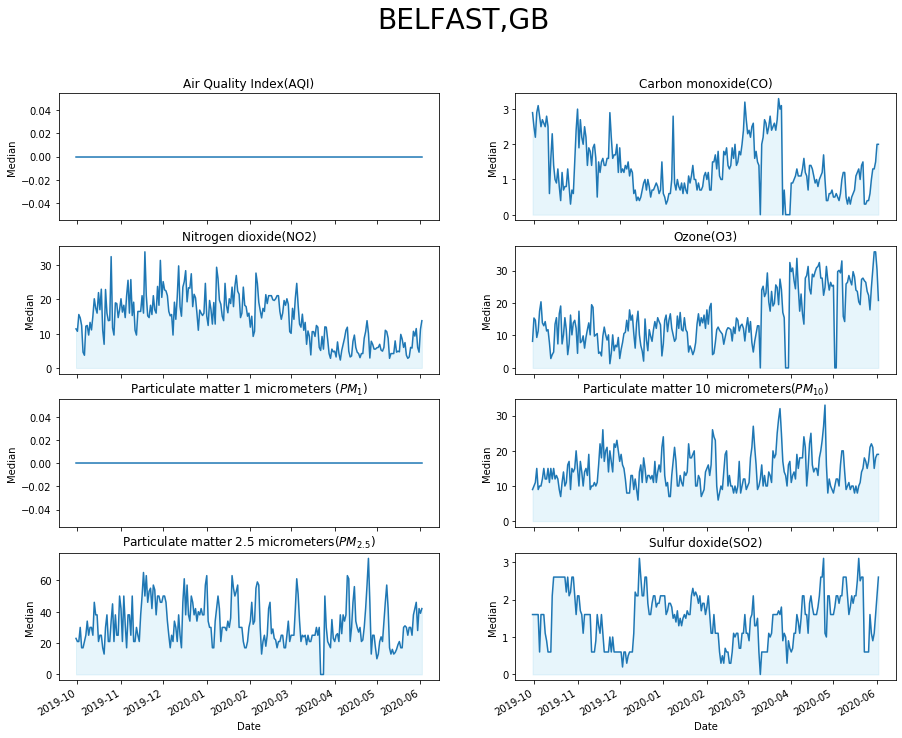

In [29]:
plot_all_out_2(oriData=airQuality_median,Country='GB',City='BELFAST')

### Merging Community Mobility dataset with Air Quality dataset

Before we do anything, we need take a quick look is there any intersect value between two data set

In [30]:
print(np.intersect1d((globalMobility['country_region_code'].unique()),(airQuality_median['Country'].unique())))
print(np.intersect1d((globalMobility['sub_region_1'].unique()),(airQuality_median['City'].unique())))

['AE' 'AF' 'AR' 'AT' 'AU' 'BA' 'BD' 'BE' 'BG' 'BH' 'BO' 'BR' 'CA' 'CH'
 'CI' 'CL' 'CO' 'CR' 'CZ' 'DE' 'DK' 'EC' 'EE' 'ES' 'FI' 'FR' 'GB' 'GE'
 'GH' 'GR' 'GT' 'HK' 'HR' 'HU' 'ID' 'IE' 'IL' 'IN' 'IQ' 'IT' 'JO' 'JP'
 'KG' 'KR' 'KW' 'KZ' 'LA' 'LK' 'LT' 'MK' 'ML' 'MM' 'MN' 'MX' 'MY' 'NL'
 'NO' 'NP' 'NZ' 'PE' 'PH' 'PK' 'PL' 'PR' 'PT' 'RE' 'RO' 'RS' 'SA' 'SE'
 'SG' 'SK' 'SV' 'TH' 'TJ' 'TR' 'TW' 'UG' 'US' 'VN' 'ZA']
['ABU DHABI' 'ADANA' 'AGUASCALIENTES' 'AKITA' 'ANKARA' 'AUCKLAND'
 'BALIKESIR' 'BELFAST' 'BERLIN' 'BRUSSELS' 'BUCHAREST' 'BUDAPEST'
 'BUENOS AIRES' 'BURGAS' 'BURSA' 'CARDIFF' 'CHANDIGARH' 'CHIBA' 'DELHI'
 'DENIZLI' 'DUBAI' 'EDINBURGH' 'ERZURUM' 'ESKIŞEHIR' 'FUKUOKA' 'GRANADA'
 'GRONINGEN' 'HAMBURG' 'HANOI' 'HIROSHIMA' 'HO CHI MINH CITY' 'JAKARTA'
 'KAGOSHIMA' 'KAYSERI' 'KOCHI' 'KONYA' 'KUMAMOTO' 'KYOTO' 'KÜTAHYA'
 'LEICESTER' 'LISBON' 'MALACCA' 'MEXICO CITY' 'MIYAZAKI' 'NAGANO'
 'NAGASAKI' 'NEWPORT' 'NIIGATA' 'OAXACA' 'OKAYAMA' 'OSAKA' 'OSLO'
 'PLYMOUTH' 'PRAGUE' 'PUEBLA' 'READING'

In [31]:
globalMobility[globalMobility['country_region_code'] == 'SG'].head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
162647,SG,SINGAPORE,,,2020-02-15,-14.0,-9.0,-10.0,-17.0,-4.0,8.0
162648,SG,SINGAPORE,,,2020-02-16,-19.0,-17.0,-18.0,-22.0,-7.0,8.0
162649,SG,SINGAPORE,,,2020-02-17,-12.0,-6.0,-7.0,-14.0,-4.0,7.0
162650,SG,SINGAPORE,,,2020-02-18,-13.0,-9.0,-7.0,-15.0,-5.0,7.0
162651,SG,SINGAPORE,,,2020-02-19,-14.0,-14.0,-6.0,-15.0,-5.0,8.0


In [32]:
airQuality_median[airQuality_median['Country'] == 'SG'].head()

Specie,Date,Country,City,AQI,CO,NO2,O3,PM1,PM10,PM25,SO2
457,2019-09-30,SG,SINGAPORE,0.0,7.0,0.0,8.0,0.0,29.0,61.0,5.0
1034,2019-10-01,SG,SINGAPORE,0.0,7.0,0.0,6.0,0.0,32.0,68.0,8.0
1611,2019-10-02,SG,SINGAPORE,0.0,7.0,0.0,6.0,0.0,35.0,68.0,6.0
2191,2019-10-03,SG,SINGAPORE,0.0,6.0,0.0,7.0,0.0,32.0,63.0,7.0
2765,2019-10-04,SG,SINGAPORE,0.0,6.0,0.0,6.0,0.0,25.0,46.0,7.0


Realized for certain small country like Singapore, the Capital City of Singapore is same its country. Also, column:'City' seems meant for capital city for that Country Code. Thus, we will need to further lookup capital city for community dataset

In [33]:
# Importing world cities dataset
worldCities = pd.read_csv("Dataset\worldcities.csv")
worldCities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519


In [34]:
worldCities_obj = worldCities.select_dtypes(['object'])
worldCities[worldCities_obj.columns] = worldCities_obj.apply(lambda x: x.str.upper())

In [35]:
worldCities_obj = worldCities.select_dtypes(['object'])
worldCities[worldCities_obj.columns] = worldCities_obj.apply(lambda x: x.str.strip())

In [36]:
worldCities[worldCities['iso2'].isin(['SG','HK'])]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
32,HONG KONG,HONG KONG,22.305,114.1850,HONG KONG,HK,HKG,NaN,NaN,7206000.0,1344982653
53,SINGAPORE,SINGAPORE,1.293,103.8558,SINGAPORE,SG,SGP,NaN,PRIMARY,5183700.0,1702341327


Above is for iso2 of SG which is for Singapore. We can see that the column:'admin_name' is equal to NaN. This is can assume that due to small country like Singapore, its capital city will be same as their country name. This is apply to Hong Kong too. Thus, we will replace NaN to same as their city name in order to increase the matching result.

In [37]:
worldCities['admin_name'] = np.where(worldCities['admin_name'].isnull(), worldCities['city'], worldCities['admin_name'])

In [38]:
worldCities[worldCities['iso2'].isin(['SG','HK'])]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
32,HONG KONG,HONG KONG,22.305,114.1850,HONG KONG,HK,HKG,HONG KONG,NaN,7206000.0,1344982653
53,SINGAPORE,SINGAPORE,1.293,103.8558,SINGAPORE,SG,SGP,SINGAPORE,PRIMARY,5183700.0,1702341327


Same goes for community mobility dataset where sub_region_1 is empty for those small countries.

In [39]:
globalMobility[(globalMobility['country_region_code'].isin(['SG','HK']))]

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
69560,HK,HONG KONG,,,2020-02-15,-26.0,-4.0,-26.0,-34.0,-18.0,14.0
69561,HK,HONG KONG,,,2020-02-16,-28.0,-12.0,-35.0,-36.0,-19.0,13.0
69562,HK,HONG KONG,,,2020-02-17,-23.0,-3.0,-14.0,-32.0,-21.0,15.0
69563,HK,HONG KONG,,,2020-02-18,-24.0,-5.0,-11.0,-33.0,-21.0,16.0
69564,HK,HONG KONG,,,2020-02-19,-24.0,-8.0,-11.0,-31.0,-17.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...
162747,SG,SINGAPORE,,,2020-05-25,-62.0,-9.0,-54.0,-72.0,-82.0,48.0
162748,SG,SINGAPORE,,,2020-05-26,-61.0,-18.0,-58.0,-63.0,-61.0,40.0
162749,SG,SINGAPORE,,,2020-05-27,-61.0,-20.0,-57.0,-62.0,-61.0,41.0
162750,SG,SINGAPORE,,,2020-05-28,-63.0,-21.0,-59.0,-61.0,-61.0,41.0


We will copy over from column:'country_region' into column:'sub_region_1' if column:'sub_region_1' is empty. This is to increase matched result of the city lookup value.

In [40]:
globalMobility['sub_region_1'] = np.where(globalMobility['sub_region_1'] == '', globalMobility['country_region'], globalMobility['sub_region_1'])

In [41]:
globalMobility[(globalMobility['country_region_code'].isin(['SG','HK']))]

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
69560,HK,HONG KONG,HONG KONG,,2020-02-15,-26.0,-4.0,-26.0,-34.0,-18.0,14.0
69561,HK,HONG KONG,HONG KONG,,2020-02-16,-28.0,-12.0,-35.0,-36.0,-19.0,13.0
69562,HK,HONG KONG,HONG KONG,,2020-02-17,-23.0,-3.0,-14.0,-32.0,-21.0,15.0
69563,HK,HONG KONG,HONG KONG,,2020-02-18,-24.0,-5.0,-11.0,-33.0,-21.0,16.0
69564,HK,HONG KONG,HONG KONG,,2020-02-19,-24.0,-8.0,-11.0,-31.0,-17.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...
162747,SG,SINGAPORE,SINGAPORE,,2020-05-25,-62.0,-9.0,-54.0,-72.0,-82.0,48.0
162748,SG,SINGAPORE,SINGAPORE,,2020-05-26,-61.0,-18.0,-58.0,-63.0,-61.0,40.0
162749,SG,SINGAPORE,SINGAPORE,,2020-05-27,-61.0,-20.0,-57.0,-62.0,-61.0,41.0
162750,SG,SINGAPORE,SINGAPORE,,2020-05-28,-63.0,-21.0,-59.0,-61.0,-61.0,41.0


In [42]:
worldCities[worldCities['iso2'] == 'MY']['admin_name'].unique()

array(['PULAU PINANG', 'KUALA LUMPUR', 'SELANGOR', 'JOHOR', 'MELAKA',
       'PERAK', 'SARAWAK', 'SABAH', 'KELANTAN', 'NEGERI SEMBILAN',
       'PAHANG', 'KEDAH', 'TERENGGANU', 'PUTRAJAYA', 'PERLIS', 'LABUAN'],
      dtype=object)

In [43]:
globalMobility[globalMobility['country_region_code'] == 'MY']['sub_region_1'].unique()

array(['MALAYSIA', 'FEDERAL TERRITORY OF KUALA LUMPUR', 'JOHOR', 'KEDAH',
       'KELANTAN', 'LABUAN FEDERAL TERRITORY', 'MALACCA',
       'NEGERI SEMBILAN', 'PAHANG', 'PENANG', 'PERAK', 'PERLIS',
       'PUTRAJAYA', 'SABAH', 'SARAWAK', 'SELANGOR', 'TERENGGANU'],
      dtype=object)

In [44]:
worldCities['admin_name'] = worldCities['admin_name'].replace('KUALA LUMPUR','FEDERAL TERRITORY OF KUALA LUMPUR')
worldCities['admin_name'] = worldCities['admin_name'].replace('LABUAN','LABUAN FEDERAL TERRITORY')
worldCities['admin_name'] = worldCities['admin_name'].replace('MELAKA','MALACCA')
worldCities['admin_name'] = worldCities['admin_name'].replace('PULAU PINANG','PENANG')

In [45]:
worldCities[worldCities['iso2'] == 'MY']['admin_name'].unique()

array(['PENANG', 'FEDERAL TERRITORY OF KUALA LUMPUR', 'SELANGOR', 'JOHOR',
       'MALACCA', 'PERAK', 'SARAWAK', 'SABAH', 'KELANTAN',
       'NEGERI SEMBILAN', 'PAHANG', 'KEDAH', 'TERENGGANU', 'PUTRAJAYA',
       'PERLIS', 'LABUAN FEDERAL TERRITORY'], dtype=object)

At first we will need to join Community Mobility Dataset and Word Cities Dataset to add extract captial city for each record in Community Mobility Dataset. 

In [46]:
world_city = worldCities[['iso2','admin_name','city']]
print(world_city[world_city['admin_name'] == 'JOHOR'])

# This is reduce the world city list only first row of the record which is the capital city
world_city = world_city.groupby(['iso2','admin_name']).first().reset_index()
world_city[world_city['admin_name'] == 'JOHOR']

     iso2 admin_name         city
687    MY      JOHOR  JOHOR BAHRU
2109   MY      JOHOR   BATU PAHAT
2165   MY      JOHOR         MUAR
2354   MY      JOHOR       KLUANG


,iso2,admin_name,city
2374,MY,JOHOR,JOHOR BAHRU


In [47]:
globalMobility = pd.merge(globalMobility,world_city,how='left',
                         left_on=['country_region_code','sub_region_1'],
                         right_on=['iso2','admin_name'])

In [48]:
globalMobility = globalMobility.drop(['iso2','admin_name'], axis=1)

In [49]:
globalMobility.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'date', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'city'],
      dtype='object')

In [50]:
globalMobility = globalMobility[['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2', 'city',
       'date', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']]

In [51]:
globalMobility[(globalMobility['country_region_code'].isin(['SG','HK']))]

,country_region_code,country_region,sub_region_1,sub_region_2,city,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
69560,HK,HONG KONG,HONG KONG,,HONG KONG,2020-02-15,-26.0,-4.0,-26.0,-34.0,-18.0,14.0
69561,HK,HONG KONG,HONG KONG,,HONG KONG,2020-02-16,-28.0,-12.0,-35.0,-36.0,-19.0,13.0
69562,HK,HONG KONG,HONG KONG,,HONG KONG,2020-02-17,-23.0,-3.0,-14.0,-32.0,-21.0,15.0
69563,HK,HONG KONG,HONG KONG,,HONG KONG,2020-02-18,-24.0,-5.0,-11.0,-33.0,-21.0,16.0
69564,HK,HONG KONG,HONG KONG,,HONG KONG,2020-02-19,-24.0,-8.0,-11.0,-31.0,-17.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
162747,SG,SINGAPORE,SINGAPORE,,SINGAPORE,2020-05-25,-62.0,-9.0,-54.0,-72.0,-82.0,48.0
162748,SG,SINGAPORE,SINGAPORE,,SINGAPORE,2020-05-26,-61.0,-18.0,-58.0,-63.0,-61.0,40.0
162749,SG,SINGAPORE,SINGAPORE,,SINGAPORE,2020-05-27,-61.0,-20.0,-57.0,-62.0,-61.0,41.0
162750,SG,SINGAPORE,SINGAPORE,,SINGAPORE,2020-05-28,-63.0,-21.0,-59.0,-61.0,-61.0,41.0


In [52]:
globalMobility['city'] = globalMobility['city'].fillna("")

In [53]:
airQuality_median[airQuality_median['Country'] == 'MY']['City'].unique()

array(['ALOR SETAR', 'GEORGE TOWN', 'IPOH', 'JOHOR BAHRU', 'KLANG',
       'KOTA BHARU', 'KUALA LUMPUR', 'KUANTAN', 'KUCHING', 'MALACCA',
       'MIRI', 'SEREMBAN', 'TAIPING'], dtype=object)

In [54]:
globalMobility[globalMobility['country_region'] == 'MALAYSIA']['city'].unique()

array(['', 'KUALA LUMPUR', 'JOHOR BAHRU', 'SUNGAI PETANI', 'KOTA BHARU',
       'LABUAN', 'MELAKA', 'SEREMBAN', 'KUANTAN', 'GEORGE TOWN', 'IPOH',
       'KANGAR', 'PUTRAJAYA', 'KOTA KINABALU', 'KUCHING', 'KLANG',
       'KUALA TERENGGANU'], dtype=object)

In [55]:
globalMobility['city'] = globalMobility['city'].replace('MELAKA','MALACCA')

Below show that sub_region_2 only available for US. Since we will join with Air Quality Dataset that only contain Country code and City, we will drop those record having sub_region_2.

In [56]:
globalMobility[globalMobility['sub_region_2'] != '']

,country_region_code,country_region,sub_region_1,sub_region_2,city,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
184274,US,UNITED STATES,ALABAMA,AUTAUGA COUNTY,BIRMINGHAM,2020-02-15,5.0,7.0,NaN,NaN,-4.0,NaN
184275,US,UNITED STATES,ALABAMA,AUTAUGA COUNTY,BIRMINGHAM,2020-02-16,0.0,1.0,-23.0,NaN,-4.0,NaN
184276,US,UNITED STATES,ALABAMA,AUTAUGA COUNTY,BIRMINGHAM,2020-02-17,8.0,0.0,NaN,NaN,-27.0,5.0
184277,US,UNITED STATES,ALABAMA,AUTAUGA COUNTY,BIRMINGHAM,2020-02-18,-2.0,0.0,NaN,NaN,2.0,0.0
184278,US,UNITED STATES,ALABAMA,AUTAUGA COUNTY,BIRMINGHAM,2020-02-19,-2.0,0.0,NaN,NaN,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
466110,US,UNITED STATES,WYOMING,WESTON COUNTY,CHEYENNE,2020-05-25,NaN,NaN,NaN,NaN,-62.0,NaN
466111,US,UNITED STATES,WYOMING,WESTON COUNTY,CHEYENNE,2020-05-26,NaN,NaN,NaN,NaN,-27.0,NaN
466112,US,UNITED STATES,WYOMING,WESTON COUNTY,CHEYENNE,2020-05-27,NaN,NaN,NaN,NaN,-26.0,NaN
466113,US,UNITED STATES,WYOMING,WESTON COUNTY,CHEYENNE,2020-05-28,NaN,NaN,NaN,NaN,-22.0,NaN


In [57]:
globalMobility.drop(globalMobility[globalMobility['sub_region_2'] != ''].index,inplace=True)

#drop entire column since it will empty
globalMobility = globalMobility.drop(['sub_region_2'],axis=1)

In [58]:
globalMobility_airQuality = pd.merge(globalMobility,airQuality_median, how='inner', left_on=['country_region_code','city','date'], right_on=['Country','City','Date'])
globalMobility_airQuality.head()

,country_region_code,country_region,sub_region_1,city,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,...,Country,City,AQI,CO,NO2,O3,PM1,PM10,PM25,SO2
0,AT,AUSTRIA,SALZBURG,SALZBURG,2020-02-15,8.0,6.0,36.0,6.0,0.0,...,AT,SALZBURG,0.0,0.1,11.2,0.0,0.0,9.0,0.0,1.1
1,AT,AUSTRIA,SALZBURG,SALZBURG,2020-02-16,19.0,23.0,39.0,6.0,1.0,...,AT,SALZBURG,0.0,0.1,9.6,0.0,0.0,7.0,0.0,1.1
2,AT,AUSTRIA,SALZBURG,SALZBURG,2020-02-17,19.0,14.0,43.0,5.0,1.0,...,AT,SALZBURG,0.0,0.1,13.3,0.0,0.0,14.0,0.0,1.6
3,AT,AUSTRIA,SALZBURG,SALZBURG,2020-02-18,18.0,12.0,52.0,0.0,2.0,...,AT,SALZBURG,0.0,0.1,9.6,0.0,0.0,8.0,0.0,1.1
4,AT,AUSTRIA,SALZBURG,SALZBURG,2020-02-19,11.0,11.0,11.0,0.0,2.0,...,AT,SALZBURG,0.0,0.1,11.5,0.0,0.0,8.0,0.0,1.1


In [59]:
globalMobility_airQuality = globalMobility_airQuality.drop(['country_region_code','sub_region_1','date','city'],axis=1)

In [60]:
globalMobility_airQuality.head()

,country_region,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Date,Country,City,AQI,CO,NO2,O3,PM1,PM10,PM25,SO2
0,AUSTRIA,8.0,6.0,36.0,6.0,0.0,-2.0,2020-02-15,AT,SALZBURG,0.0,0.1,11.2,0.0,0.0,9.0,0.0,1.1
1,AUSTRIA,19.0,23.0,39.0,6.0,1.0,-2.0,2020-02-16,AT,SALZBURG,0.0,0.1,9.6,0.0,0.0,7.0,0.0,1.1
2,AUSTRIA,19.0,14.0,43.0,5.0,1.0,0.0,2020-02-17,AT,SALZBURG,0.0,0.1,13.3,0.0,0.0,14.0,0.0,1.6
3,AUSTRIA,18.0,12.0,52.0,0.0,2.0,0.0,2020-02-18,AT,SALZBURG,0.0,0.1,9.6,0.0,0.0,8.0,0.0,1.1
4,AUSTRIA,11.0,11.0,11.0,0.0,2.0,1.0,2020-02-19,AT,SALZBURG,0.0,0.1,11.5,0.0,0.0,8.0,0.0,1.1


In [61]:
globalMobility_airQuality.columns

Index(['country_region', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'Date', 'Country', 'City',
       'AQI', 'CO', 'NO2', 'O3', 'PM1', 'PM10', 'PM25', 'SO2'],
      dtype='object')

In [62]:
globalMobility_airQuality = globalMobility_airQuality[['Country','country_region', 'City', 'Date', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline',
       'AQI', 'CO', 'NO2', 'O3', 'PM1', 'PM10', 'PM25', 'SO2']]

In [63]:
globalMobility_airQuality.columns

Index(['Country', 'country_region', 'City', 'Date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'AQI', 'CO', 'NO2', 'O3',
       'PM1', 'PM10', 'PM25', 'SO2'],
      dtype='object')

In [64]:
globalMobility_airQuality.head()

,Country,country_region,City,Date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,AQI,CO,NO2,O3,PM1,PM10,PM25,SO2
0,AT,AUSTRIA,SALZBURG,2020-02-15,8.0,6.0,36.0,6.0,0.0,-2.0,0.0,0.1,11.2,0.0,0.0,9.0,0.0,1.1
1,AT,AUSTRIA,SALZBURG,2020-02-16,19.0,23.0,39.0,6.0,1.0,-2.0,0.0,0.1,9.6,0.0,0.0,7.0,0.0,1.1
2,AT,AUSTRIA,SALZBURG,2020-02-17,19.0,14.0,43.0,5.0,1.0,0.0,0.0,0.1,13.3,0.0,0.0,14.0,0.0,1.6
3,AT,AUSTRIA,SALZBURG,2020-02-18,18.0,12.0,52.0,0.0,2.0,0.0,0.0,0.1,9.6,0.0,0.0,8.0,0.0,1.1
4,AT,AUSTRIA,SALZBURG,2020-02-19,11.0,11.0,11.0,0.0,2.0,1.0,0.0,0.1,11.5,0.0,0.0,8.0,0.0,1.1


In [65]:
print("Country list:")
print(globalMobility_airQuality['Country'].unique())

selected_country = 'US'
print("\nSelected City list: " + selected_country)
print(globalMobility_airQuality[globalMobility_airQuality['Country'] == selected_country]['City'].unique())

Country list:
['AT' 'AU' 'BE' 'BG' 'CA' 'CL' 'CO' 'DE' 'EC' 'ES' 'FI' 'FR' 'GB' 'GT'
 'HK' 'HU' 'ID' 'IN' 'IT' 'JP' 'MX' 'MY' 'NL' 'NO' 'NZ' 'PK' 'PR' 'PT'
 'RE' 'RO' 'SG' 'TR' 'US' 'VN' 'ZA']

Selected City list: US
['PHOENIX' 'LITTLE ROCK' 'LOS ANGELES' 'DENVER' 'MIAMI' 'ATLANTA'
 'HONOLULU' 'BOISE' 'CHICAGO' 'INDIANAPOLIS' 'PORTLAND' 'BALTIMORE'
 'BOSTON' 'DETROIT' 'JACKSON' 'OMAHA' 'LAS VEGAS' 'ALBUQUERQUE'
 'CHARLOTTE' 'OKLAHOMA CITY' 'PHILADELPHIA' 'PROVIDENCE' 'NASHVILLE'
 'DALLAS' 'SALT LAKE CITY' 'SEATTLE' 'MILWAUKEE']


## Prediction

In [66]:
list(globalMobility_airQuality.columns)

['Country',
 'country_region',
 'City',
 'Date',
 'retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline',
 'AQI',
 'CO',
 'NO2',
 'O3',
 'PM1',
 'PM10',
 'PM25',
 'SO2']

Check and remove empty rows

In [67]:
globalMobility_airQuality.isnull().sum()

Country                                                 0
country_region                                          0
City                                                    0
Date                                                    0
retail_and_recreation_percent_change_from_baseline     22
grocery_and_pharmacy_percent_change_from_baseline      29
parks_percent_change_from_baseline                     92
transit_stations_percent_change_from_baseline           0
workplaces_percent_change_from_baseline                22
residential_percent_change_from_baseline              161
AQI                                                     0
CO                                                      0
NO2                                                     0
O3                                                      0
PM1                                                     0
PM10                                                    0
PM25                                                    0
SO2           

In [68]:
globalMobility_airQuality = globalMobility_airQuality.dropna()
globalMobility_airQuality.isnull().sum()

Country                                               0
country_region                                        0
City                                                  0
Date                                                  0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
AQI                                                   0
CO                                                    0
NO2                                                   0
O3                                                    0
PM1                                                   0
PM10                                                  0
PM25                                                  0
SO2                                             

In [69]:
df_mobility_NO2 = globalMobility_airQuality[['residential_percent_change_from_baseline','NO2']]
df_mobility_NO2

,residential_percent_change_from_baseline,NO2
0,-2.0,11.2
1,-2.0,9.6
2,0.0,13.3
3,0.0,9.6
4,1.0,11.5
...,...,...
18694,28.0,0.0
18695,27.0,0.0
18696,25.0,0.0
18697,28.0,0.0


In [70]:
df_mobility_NO2 = df_mobility_NO2[df_mobility_NO2['NO2'] != 0]
df_mobility_NO2

,residential_percent_change_from_baseline,NO2
0,-2.0,11.2
1,-2.0,9.6
2,0.0,13.3
3,0.0,9.6
4,1.0,11.5
...,...,...
18685,21.0,3.2
18686,17.0,3.2
18687,27.0,3.2
18688,27.0,3.7


Check the average of NO2

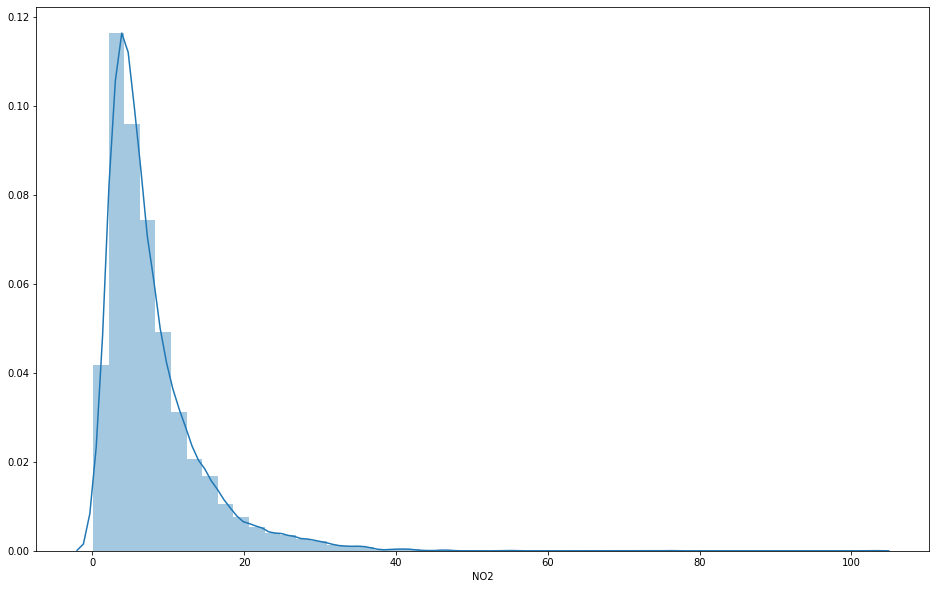

In [71]:
plt.figure(figsize = (16,10))
plt.tight_layout()
seabornInstance.distplot(df_mobility_NO2['NO2'])
plt.show()

In [72]:
X = df_mobility_NO2.drop('NO2', axis=1).values.reshape(-1,1)
X.shape

(14676, 1)

In [73]:
X

array([[-2.],
       [-2.],
       [ 0.],
       ...,
       [27.],
       [27.],
       [27.]])

In [74]:
y = df_mobility_NO2['NO2'].values
y.shape

(14676,)

In [75]:
y

array([11.2,  9.6, 13.3, ...,  3.2,  3.7, 11.9])

Split 80% of the data to the training set while 20% of the data to test set

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

####  SVR RBF Regression

In [77]:
svr_rbf_model = SVR(kernel = 'rbf', C = 100, gamma = 0.1, epsilon = .1)
svr_rbf_model.fit(X_train, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [78]:
y_rbf_pred = svr_rbf_model.predict(X_test)
y_rbf_pred

array([5.57388983, 5.57388983, 4.80026273, ..., 6.40016667, 5.79998272,
       6.25592142])

Compare the actual output values for X_test with the predicted values

In [79]:
df_actual_predicted = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_rbf_pred.flatten()})
df_actual_predicted

,Actual,Predicted
0,2.6,5.573890
1,9.2,5.573890
2,4.7,4.800263
3,2.8,5.699913
4,8.4,5.266243
...,...,...
2931,2.3,9.312715
2932,7.5,5.758332
2933,4.7,6.400167
2934,7.5,5.799983


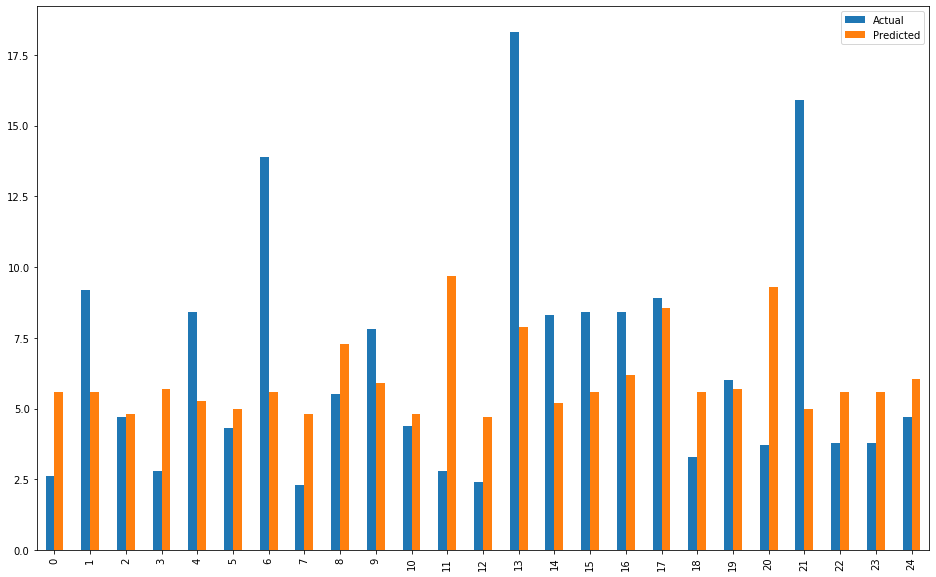

In [80]:
df_actual_predicted_25 = df_actual_predicted.head(25)
df_actual_predicted_25.plot(kind = 'bar',figsize = (16,10))
plt.show()

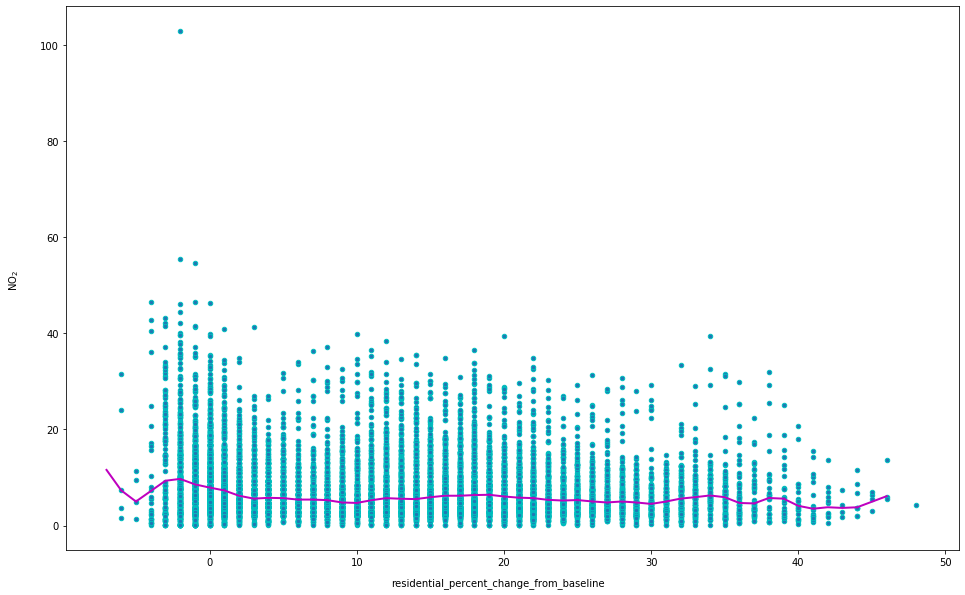

In [81]:
df_rbf_pred = pd.concat([pd.DataFrame(X_test, columns = ['X']), pd.DataFrame(y_rbf_pred, columns=['y'])], axis=1)
df_rbf_pred = df_rbf_pred.sort_values(by = 'X')

fig, ax = plt.subplots(figsize = (16,10))
ax.plot(df_rbf_pred['X'], df_rbf_pred['y'], color='m', lw = 2)
ax.scatter(X_train[svr_rbf_model.support_], y_train[svr_rbf_model.support_], edgecolor='c', s=20)
fig.text(0.5, 0.08, 'residential_percent_change_from_baseline', ha='center', va='center')
fig.text(0.08, 0.5, 'NO$_2$', ha='center', va='center', rotation='vertical')
plt.show()

To check the value of the intercept calculated by the radial basis function (RBF) regression algorithm for our dataset

In [82]:
print("Intercept = " + str(svr_rbf_model.intercept_))

Intercept = [6.04348028]


Calculate MAE to judge the quality of model 

In [83]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_rbf_pred))  

Mean Absolute Error: 4.044601314932203


#### SVR Linear regression

In [84]:
svr_linear_model = SVR(kernel='linear', C=100, gamma='auto')
svr_linear_model.fit(X_train, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [85]:
y_linear_pred = svr_linear_model.predict(X_test)
y_linear_pred

array([5.93636364, 5.93636364, 5.17272727, ..., 5.60909091, 5.5       ,
       4.79090909])

Compare the actual output values for X_test with the predicted values

In [86]:
df_actual_predicted = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_linear_pred.flatten()})
df_actual_predicted

,Actual,Predicted
0,2.6,5.936364
1,9.2,5.936364
2,4.7,5.172727
3,2.8,6.372727
4,8.4,6.045455
...,...,...
2931,2.3,6.809091
2932,7.5,6.427273
2933,4.7,5.609091
2934,7.5,5.500000


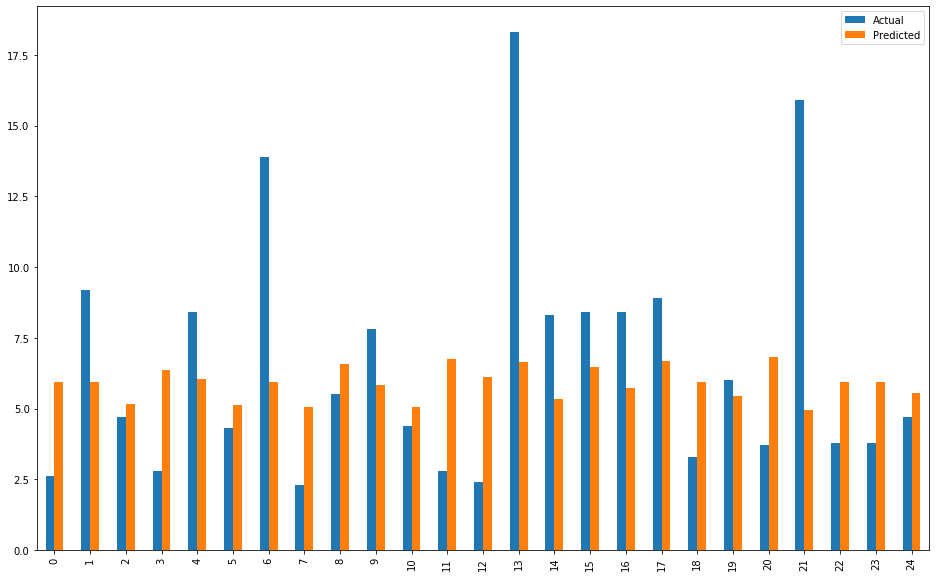

In [87]:
df_actual_predicted_25 = df_actual_predicted.head(25)
df_actual_predicted_25.plot(kind = 'bar',figsize = (16,10))
plt.show()

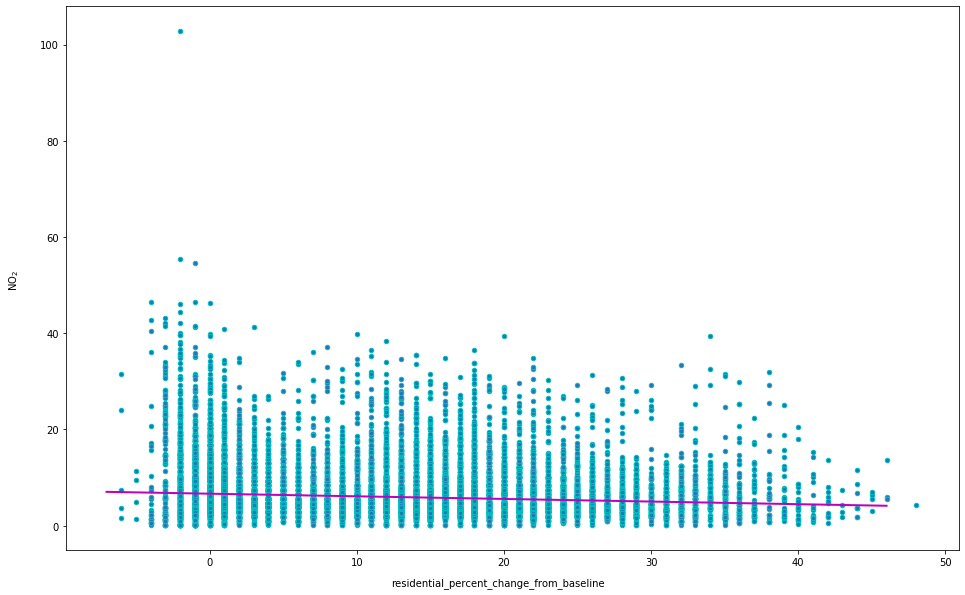

In [88]:
df_linear_pred = pd.concat([pd.DataFrame(X_test, columns = ['X']), pd.DataFrame(y_linear_pred, columns=['y'])], axis=1)
df_linear_pred = df_linear_pred.sort_values(by = 'X')

fig, ax = plt.subplots(figsize = (16,10))
ax.plot(df_linear_pred['X'], df_linear_pred['y'], color='m', lw = 2)
ax.scatter(X_train[svr_linear_model.support_], y_train[svr_linear_model.support_], edgecolor='c', s=20)
fig.text(0.5, 0.08, 'residential_percent_change_from_baseline', ha='center', va='center')
fig.text(0.08, 0.5, 'NO$_2$', ha='center', va='center', rotation='vertical')
plt.show()

To check the value of the intercept and slope calculated by the linear regression algorithm for our dataset

In [89]:
print("Intercept = " + str(svr_linear_model.intercept_))
print("Slope = " + str(svr_linear_model.coef_))

Intercept = [6.64545455]
Slope = [[-0.05454545]]


Calculate MAE to judge the quality of model 

In [90]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_linear_pred))  

Mean Absolute Error: 4.10894538023227


### Conclusion

Due to Covid-19, we can see there are significant activity drop of all public area and increase of residential area. All people around the world are fighthing against Covid-19 at their very best. We all followed the movement control, we all endured at home, and lastly we survive from Covid-19. At the same period, we can see that the Air Quality Index(AQI) dropped and NO2 has the most significant drop rate because this element mainly contributed by our vehicle and factory emission of NOx. Due to the drop of NOx, we can see that our Ozone(O3) is increasing because there is lesser NOx to break O3 and producing NO2. Covid-19 may had taken so many innocent lives mercilessly but the world is healing is unneglectable fact.